![NLP](https://pbs.twimg.com/media/Fmi6YQNWYAAjXSc?format=jpg&name=medium)

![NLP](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 1: </font> <font color = #4854E8> Import the Recipes Review Dataset  </font>

![NLP](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 1.1: </font> <font color = #41EA46> Import Libraries and Dataset </font>

#### <font color = blue>1.1.1: Check Working Directory </font>

In [1]:
import os
os.getcwd()

'C:\\Users\\amira\\Data Science\\Semester 3\\NLP\\Sentiment Analysis\\1. Dataset'

#### <font color = blue>1.1.2: Import the Libraries

In [2]:
import re
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
from nltk.text import Text
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS

from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

plt.style.use("fivethirtyeight")

#### <font color = blue>1.1.3: Load the Dataset

In [101]:
df = pd.read_csv('own_dataset.csv')  # Own Dataset
df.head(3)

,recipe_number,recipe_code,Recipe,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_413295,u_1oKdXyogPlYgfU0TfASRuLH8Gud,Linda,1,1622718411,0,0,4,1,100,The description says &#34;Maybe it&#39;s the c...
1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_342830,u_1oKVZqcrp7XsyCKWQSihSZut0ee,DonnaLynnS,1,1622718015,0,0,2,1,100,This was terrible. I followed the recipe exac...
2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_221913,u_1oKYgYwVIfP57UMyDRWPNDnoAbW,Nee43,1,1622717413,0,0,1,1,100,I&#39;m always amazed how people rate a recipe...


![NLP](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 2: </font> <font color = #4854E8> Exploratory Data Analysis </font>

![NLP](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### <font color = blue> 2.1: Size of Data

In [102]:
df.size

19768

####  <font color = blue> 2.2: How many numbers of observations and features</font>

In [103]:
print(f'Number of Observations: {df.shape[0]}')
print(f'Number of Features: {df.shape[1]}')

Number of Observations: 1412
Number of Features: 14


####  <font color = blue> 2.3 Features that we have in this data</font>

In [104]:
df.columns

Index(['recipe_number', 'recipe_code', 'Recipe', 'comment_id', 'user_id',
       'user_name', 'user_reputation', 'created_at', 'reply_count',
       'thumbs_up', 'thumbs_down', 'stars', 'best_score', 'text'],
      dtype='object')

####  <font color = blue> 2.4 Type of Data </font>

In [105]:
df.dtypes

recipe_number       int64
recipe_code         int64
Recipe             object
comment_id         object
user_id            object
user_name          object
user_reputation     int64
created_at          int64
reply_count         int64
thumbs_up           int64
thumbs_down         int64
stars               int64
best_score          int64
text               object
dtype: object

#### <font color = blue> 2.5 Data Info</font>

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1412 entries, 0 to 1411
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   recipe_number    1412 non-null   int64 
 1   recipe_code      1412 non-null   int64 
 2   Recipe           1412 non-null   object
 3   comment_id       1412 non-null   object
 4   user_id          1412 non-null   object
 5   user_name        1412 non-null   object
 6   user_reputation  1412 non-null   int64 
 7   created_at       1412 non-null   int64 
 8   reply_count      1412 non-null   int64 
 9   thumbs_up        1412 non-null   int64 
 10  thumbs_down      1412 non-null   int64 
 11  stars            1412 non-null   int64 
 12  best_score       1412 non-null   int64 
 13  text             1412 non-null   object
dtypes: int64(9), object(5)
memory usage: 154.6+ KB


#### <font color = blue> 2.6 Recipes Distribution</font>

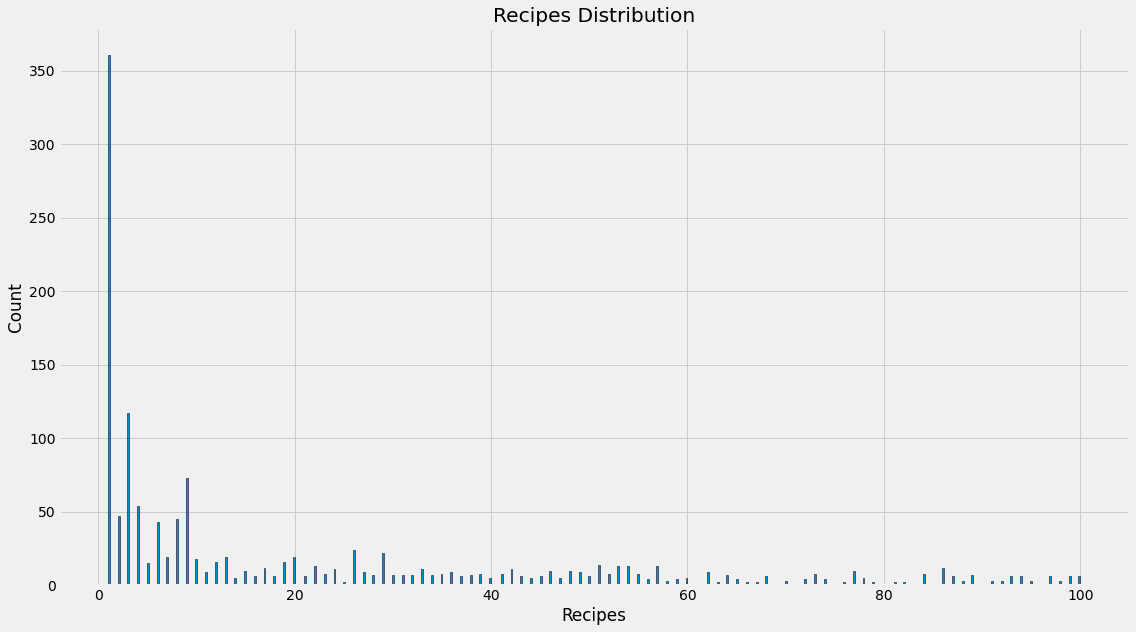

In [107]:
plt.figure(figsize = (16, 9))
bins_ = [10, 20, 30, 40, 50, 60]

plt.hist(df['recipe_number'] , bins = 500, edgecolor = 'black')

plt.title('Recipes Distribution')
plt.xlabel('Recipes')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

#### <font color = blue> 2.7 Reviews Length Distribution </font>

In [108]:
df.text = df.text.astype(str)

In [109]:
df['review_len'] = df["text"].apply(lambda x: len(x))

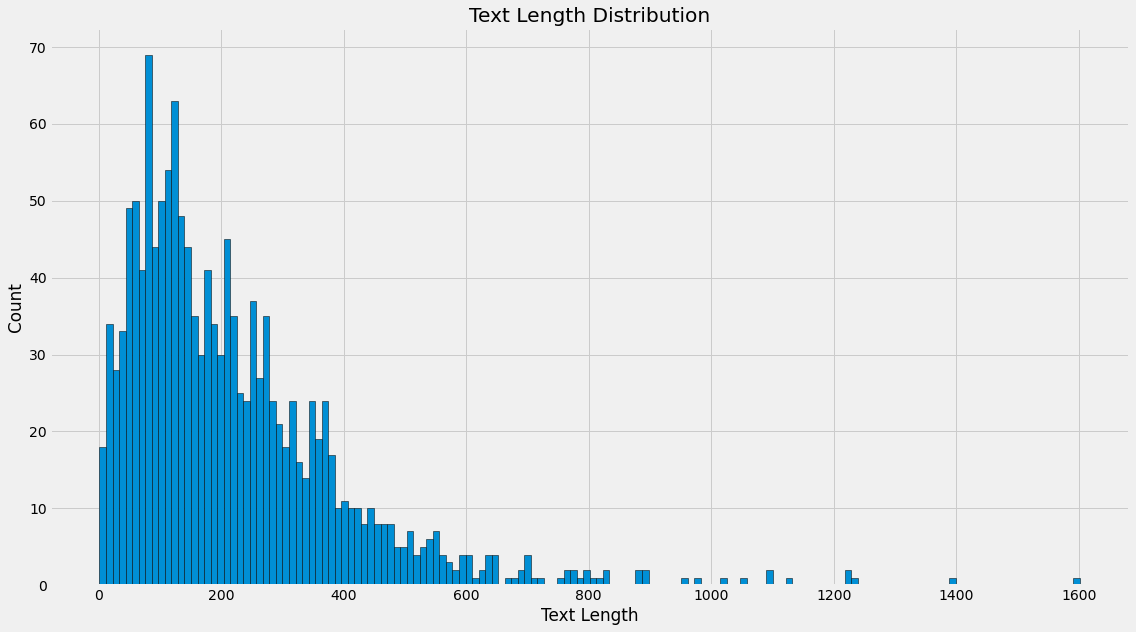

In [110]:
plt.figure(figsize = (16, 9))
bins_ = 150
plt.hist(df['review_len'], bins = bins_, edgecolor = 'black')

plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

#### <font color = blue> 2.8 Word Count Distribution </font>

In [111]:
df['word_count'] = df["text"].apply(lambda x: len(x.split()))

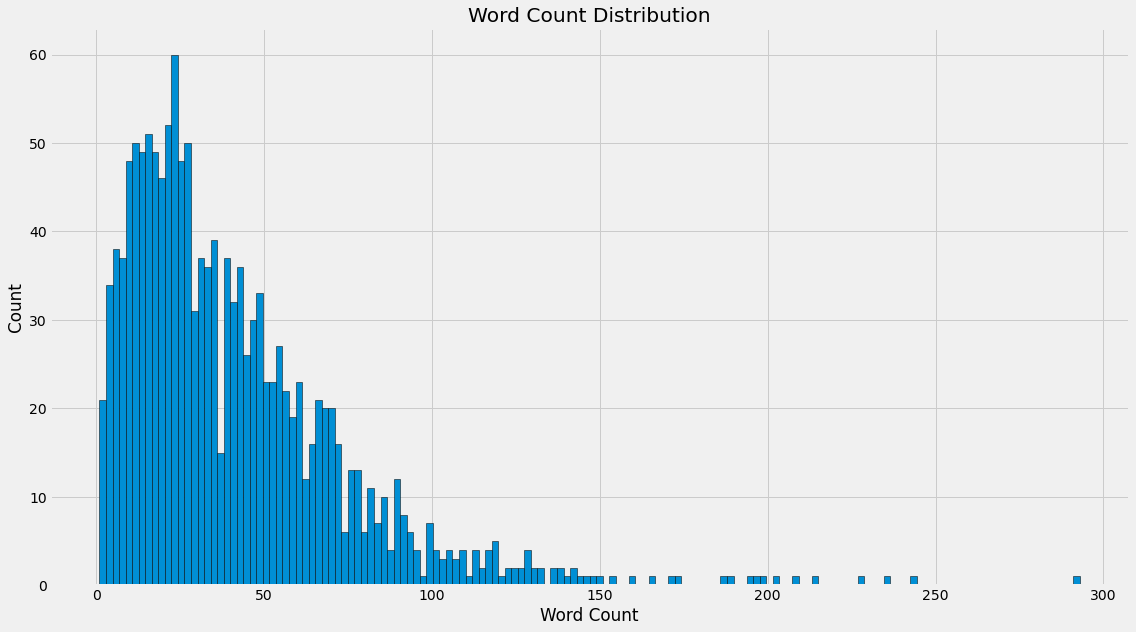

In [112]:
plt.figure(figsize = (16, 9))
bins_ = 150
plt.hist(df['word_count'],bins = bins_, edgecolor = 'black')

plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Count') 

plt.tight_layout()
plt.show()

#### <font color = blue> 2.9 Review Rating Distribution </font>

<AxesSubplot:title={'center':'Percentage of Ratings'}, ylabel='stars'>

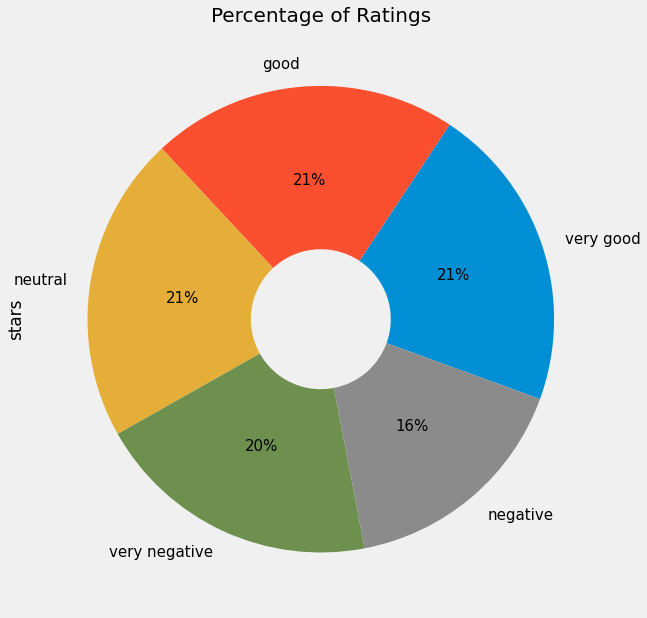

In [113]:
plt.figure(figsize=(30,10))
plt.title('Percentage of Ratings', fontsize=20)
df.stars.value_counts().plot(kind='pie', labels=['very good', 'good', 'neutral', 'very negative', 'negative'],
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})

#### <font color = blue> 2.10 Sentiment Polarity Distribution </font>

In [114]:
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

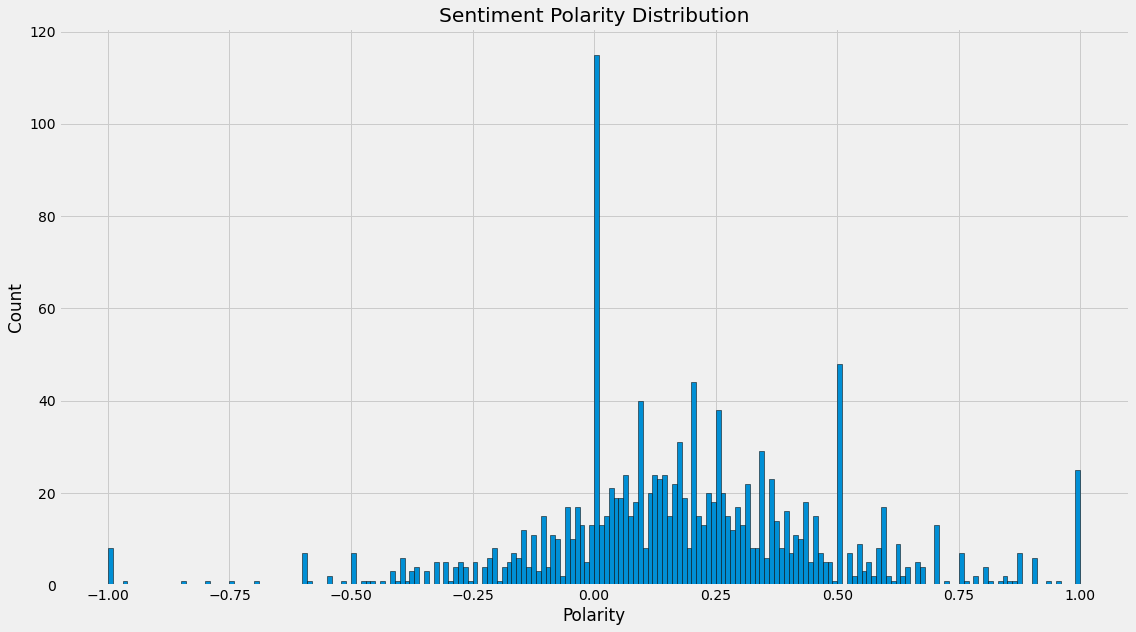

In [115]:
plt.figure(figsize = (16, 9))

plt.hist(df['polarity'], bins = 200, edgecolor = 'black')

plt.title('Sentiment Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

#### <font color = blue> 2.11 Wordcloud of Recipes Review </font>

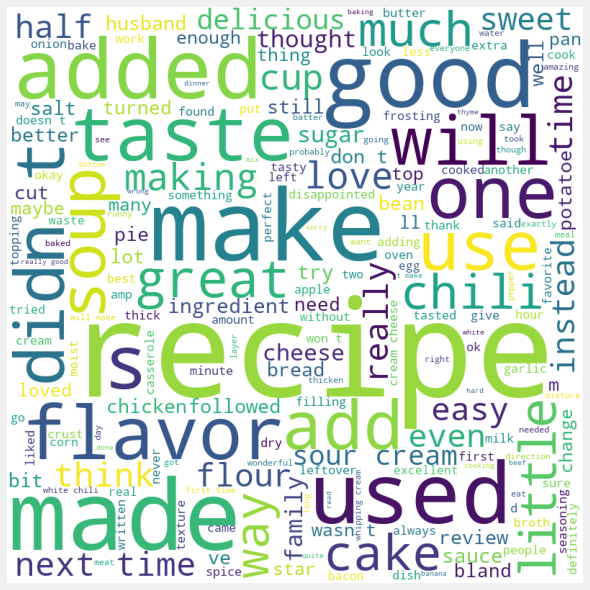

In [116]:
comment_words = ''
stopwords = set(STOPWORDS)
for val in df.text:
     
    #typecaste each val to string
    val = str(val)
 
    #split the value
    tokens = val.split()
     
    #Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

![NLP Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 3: </font> <font color = #4854E8> Data Preprocessing </font>
In this part, we did data preprocessing. firstly, we did text cleaning with the help of Regular Expression and then we apply preprocessing operations like Tokenization to make a token of each sentence, then remove stop words like "the", "a", "at" etc and then apply stemming to reducing a word to its word stem.

![NLP](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 3.1: </font> <font color = #41EA46> Text Cleaning </font>
> <b>Lowercase <br> Remove Punctuation <br> Remove Special Characters <br> Remove Digits </b>

#### <font color = blue>3.1.1: Lower Case

In [117]:
def lower_case(text):
    return text.lower()

df['text'] = df['text'].apply(lower_case)

#### <font color = blue>3.1.2: Remove Punctuation

In [118]:
def remove_punct(text):
    return text.translate(str.maketrans('','',string.punctuation))

df['text'] = df['text'].apply(remove_punct)

#### <font color = blue>3.1.3: Remove Special Characters

In [119]:
def remove_special(text):
    return " ".join(e for e in text.split() if e.isalnum())

df['text'] = df['text'].apply(remove_special)

#### <font color = blue>3.1.4: Remove Digits

In [120]:
def remove_digits(text):
    return re.sub(r'\d+', '', text)

df['text'] = df['text'].apply(remove_digits)

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 3.2: </font> <font color = #41EA46>  Preprocessing Operations </font>
> <b>Tokenizing <br> Removing Stop Words <br> Lemmatization <b>

#### <font color = blue>3.2.1: Tokenizing

In [121]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [122]:
def tokenize(text):
    text = word_tokenize(text)
    return text

df['text'] = df['text'].apply(tokenize)

#### <font color = blue>3.2.2: Removing StopWords

In [123]:
from nltk.corpus import stopwords

In [124]:
def remove_stop(text):
    text  = [i for i in text if not i in stopwords.words('english')]
    return text

df['text'] = df['text'].apply(remove_stop)

#### <font color = blue>3.2.3: Lemmatization

In [125]:
from nltk.stem import WordNetLemmatizer

In [126]:
def Lemmatize(text):
    word_lem = WordNetLemmatizer()
    text = [word_lem.lemmatize(token) for token in text]
    return text

df['text'] = df['text'].apply(Lemmatize)

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 3.3: </font> <font color = #41EA46>  Feature Extraction</font>

> <b>TF-IDF Model <br> BOW Model <b> <br> Word2Vec <br> OneHotEncoder <b>

#### <font color = blue>3.3.1 TF-IDF Model

In [127]:
# import the model
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the tf-idf vectorizer
vectorizer = TfidfVectorizer(max_features= 2000)
list_to_str = []
for lists in df['text']:
    list_to_str.append(' '.join(map(str, lists)))

df['text'] = list_to_str

text = vectorizer.fit_transform(df['text']).toarray()

#### <font color = blue>3.3.2 Bag of Word Model

In [128]:
# import the model
from sklearn.feature_extraction.text import CountVectorizer

# Create the vectorizer
vectorizer = CountVectorizer(max_features= 2000)

# Fit the vectorizer on the training data
vectorizer.fit(df['text'])

# Transform the training data into a bag-of-words representation
X_train_bow = vectorizer.transform(df['text'])

#### <font color = blue>3.3.3 Word2Vec Model

In [129]:
# import the model
from gensim.models import Word2Vec

# Train the model
model = Word2Vec(df['text'], size=100, window=5, min_count=1, workers=4)

# Get the word embedding
word_vectors = model.wv

#### <font color = blue>3.3.4 One-Hot Encoder

In [167]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot

corpus = []
for i in range(0, len(df)):
    review = df['text'][i]
    review = ''.join(review)
    corpus.append(review)
    
voc_size = 5000

onehot_repr=[one_hot(words,voc_size)for words in corpus] 

sent_length=30
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 3.4: </font> <font color = #41EA46>  Split the Dataset</font>

In [135]:
from sklearn.model_selection import train_test_split

#### <font color = blue> 3.4.1: Split the dataset into Train and Test

In [196]:
X, Y = text, target_onehot
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#### <font color = blue> 3.4.2: Training Data

In [197]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (988, 2000)
y_train (988, 5)


#### <font color = blue> 3.4.3: Testing Data

In [198]:
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_test (424, 2000)
y_test (424, 5)


![NLP Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 4: </font> <font color = #4854E8> Build the Architecture (in progress)</font>

![NLP Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### <font color = #27C3E5> 4.1: </font> <font color = #41EA46>  Random Forrest</font>

In [168]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

### <font color = #27C3E5> 4.2: </font> <font color = #41EA46>  LSTM Model</font>

In [288]:
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(5,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 30, 40)            200000    
                                                                 
 lstm_2 (LSTM)               (None, 100)               56400     
                                                                 
 dense_2 (Dense)             (None, 5)                 505       
                                                                 
Total params: 256,905
Trainable params: 256,905
Non-trainable params: 0
_________________________________________________________________
None


### <font color = #27C3E5> 4.3: </font> <font color = #41EA46>  fastText</font>

In [259]:
df_ = df[['text', 'stars']]
df_.head()

,text,stars
0,description say maybe cream cheese cream chees...,1
1,terrible followed recipe exactly tasted fine a...,1
2,im always amazed people rate recipe state chan...,1
3,didnt like creamy rich didnt feel good sour cr...,1
4,even using green chilies much hot u like,1


In [260]:
df_labeled = df_.copy()
df_labeled['stars'] = '__label__' + df_labeled['stars'].astype(str)
df_labeled.head()

,text,stars
0,description say maybe cream cheese cream chees...,__label__1
1,terrible followed recipe exactly tasted fine a...,__label__1
2,im always amazed people rate recipe state chan...,__label__1
3,didnt like creamy rich didnt feel good sour cr...,__label__1
4,even using green chilies much hot u like,__label__1


In [261]:
data = df_labeled['stars'] + " " + df_labeled['text']
print(data)

0       __label__1 description say maybe cream cheese ...
1       __label__1 terrible followed recipe exactly ta...
2       __label__1 im always amazed people rate recipe...
3       __label__1 didnt like creamy rich didnt feel g...
4       __label__1 even using green chilies much hot u...
                              ...                        
1407    __label__5 good omitted green chilies dont lik...
1408    __label__5 cut calorie fat way using nonfat so...
1409    __label__5 wonderful recipe used oz light crea...
1410    __label__5 good thing would leave salt use low...
1411    __label__5 quick easy make family asks time do...
Length: 1412, dtype: object


In [263]:
print(len(data))
count = 0
for line in range(len(data)-1, -1, -1):
    match = re.search(r'\d\d\d\d\d\d\d\d\d\d', data[line])
    try:
        if not match.group() == "":
            data = data.drop(line)
            count+=1
    except:
        count += 0
print(count)
print(len(data))

1412
0
1412


In [264]:
train, test = train_test_split(data, test_size=0.3, train_size=0.7, random_state=42)

In [266]:
import numpy

In [267]:
#write test and train into files
f_train = open("train.txt", "a")
for i in range(len(numpy.array(train))):
    f_train.write(numpy.array(train)[i] + "\n")
f_train.close()

f_test = open("test.txt", "a")
for i in range(len(numpy.array(test))):
    f_test.write(numpy.array(test)[i] + "\n")
f_test.close()

In [269]:
import fasttext

ModuleNotFoundError: No module named 'fasttext'

In [270]:
pip install fasttext

  Using cached pybind11-2.10.3-py3-none-any.whl (222 kB)
  Running setup.py clean for fasttext
Failed to build fasttext
    Running setup.py install for fasttext: started
    Running setup.py install for fasttext: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\amira\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\amira\\AppData\\Local\\Temp\\pip-install-9vfiotp4\\fasttext_5ed12eb5fbc24fca8ceed49fecab1c45\\setup.py'"'"'; __file__='"'"'C:\\Users\\amira\\AppData\\Local\\Temp\\pip-install-9vfiotp4\\fasttext_5ed12eb5fbc24fca8ceed49fecab1c45\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\amira\AppData\Local\Temp\pip-wheel-kzx_7qey'
       cwd: C:\Users\amira\AppData\Local\Temp\pip-install-9vfiotp4\fasttext_5ed12eb5fbc24fca8ceed49fecab1c45\
  Complete output (20 lines):
  C:\Users\amira\anaconda3\lib\site-packages\setuptools\dist.py:717: UserWarning: Usage of dash-separated 'desc

In [268]:
model = fasttext.train_supervised(input="train.txt")

NameError: name 'fasttext' is not defined